# **Trustworthy Machine Learning - XAI homework**


---
Group number 5

Student name #1 Balint Mucsanyi (6013671)

Student name #2 ***Insert Here***

Student name #3 ***Insert Here***

**The deadline for this homework is on 12/12/2022 at 23:59.**

**Submission**: Please download your colab notebook as .ipynb and send it to [our email](mailto:stai.there@gmail.com). Make sure that you indicate your group number and names.

---
**Structure**: This homework is structured in 3 topics. Each topic corresponds to the content of a separate lecture. We therefore recommend to only start working on each topic after attending the corresponding lecture. The recommended starting dates are indicated in the section headers, but feel free to explore by yourself, too.

You know the drill, save a copy of this notebook in your drive and work on it there!

For this homework, you also require some external python files and model checkpoints that are available [here](https://drive.google.com/drive/folders/187hr-TaeBCO6-t5ByiE5VSIl4XaLKgqw?usp=sharing). Make sure to download them to your drive and update the paths for import according throughout the notebook. **Do not use any other external libraries than the ones already defined in the notebook or consult the TML lecture staff first about usage.**

If you have any questions about the homework, feel free to drop us a message on Discord or come to the tutorials on Friday afternoon at 16:00. The lead tutor for this homework is [Elisa](mailto:elisa.nguyen@live.de). 

## **1. Introduction to explainability** (10+10+10=30 pts)
Recommended start: 18/11/2022

#### 1.1 XAI taxonomy (10 pts)
Explain the taxonomies of explainable AI methods. What does each category mean? Comment on the compatibility of the taxonomies. Give examples.

<img alt="XAI taxonomy" src="https://d3i71xaburhd42.cloudfront.net/21dff47a4142445f83016da0819ffe6dd2947f66/14-Figure7-1.png" width=600>

<font size=1>(Image source: Adadi and Berrada (2018), Scoop = Scope)</font>

<img alt="XAI problem taxonomy" src="https://www.researchgate.net/profile/Carla-Vieira-16/publication/341643347/figure/fig2/AS:895404656848907@1590492514543/Open-the-black-box-problems-taxonomy-Guidotti-et-al-2018.ppm" width=600>

<font size=1>(Image source: Guidotti et al. (2018))</font>

Let us start with the first plot. The first important distinction has to be made between **intrinsic** and **post-hoc** explainability methods.

**Intrinsically interpretable models** are ones that have an easily interpretable structure by construction. This necessarily constrains the complexity of the model in question. In the lecture we discussed two intrinsically explainable models: **sparse linear models** that consider human-interpretable features and **decision trees** with human-interpretable decision criteria. An example for such a sparse linear model could be one that takes as input medical attributes of a person (patient's name, height, age, blood sugar level, cholesterol level, blood pressure, etc.) that are easy-to-understand concepts for humans, and uses only a couple of them (e.g. only the age, blood sugar level and blood pressure) to predict the patient's risk of a certain disease. To enforce sparsity, once can use the $L^0$ norm of the weights: $\Vert w \Vert_0 = |\{i : w_i \ne 0\}|$ as a penalty, but optimizing this is an NP-Hard problem. Thus, people use convex relaxations of this penalty term, e.g. the $L^1$ norm of the weights, which corresponds to Lasso regression. An example for a human-interpretable decision tree would be a spatial decision tree with a moderate depth that also considers the previously introduced medical attributes of a patient at each level of the tree. To also mention a method that was not mentioned in the lecture, **$L^1$-regularized logistic regression** can also be deemed intrinsically explainable, where even though the contribution of each feature of the input is not linear to the final score (because of the non-linearity), the individual features' contributions can still be clearly examined by looking at the corresponding weights. Intrinsic explainability methods are by definition **model-specific**, as they correspond to individual model definitions.

We would also like to note that the **magnitude of weights** only corresponds to **feature importance** in linear methods when the features of the input are **uncorrelated** and are **on the same scale**. In decision trees we can just consider the **Gini importance**, which is a byproduct of the tree fitting process.

**Post-hoc explainability methods** are usually model-agnostic techniques (i.e., they can be applied to a wide variety of models, e.g. different NN architectures). In the lecture we learned that post-hoc explanations also linearize the models being explained, thereby also creating intrinsically explainable models, but either in only a locally faithful fashion (e.g. LIME by fitting a sparse linear model locally but performing global perturbations) or in a much more abstract setting (e.g. SHAP by linearizing a prediction in terms of the individual contribution of each feature), depending on the method being used.

We can also categorize explainability methods by considering their scope. **Global explainability** is a very challenging goal to achieve for complex models: here the goal is to explain how the model makes predictions in general, for any input, in a human-understandable way. Thus, post-hoc methods are less compatible with the goal of global explainability, and even more so with global *interpretability* (where no further explanation is needed). However, it is easily achieved for intrinsically interpretable models by definition. For example, linear models behave in the same way locally and globally. 

**Local explainability methods** tackle a much less ambitious, but nevertheless very important problem, where the aim is to explain the model's decisions for a particular test input. In Lecture 6 we were mainly concerned with such methods (attribution to **test features**), including input gradients for local perturbations, SmoothGrad for more global perturbations, integrated gradients for even more global perturbations, and finally the triad of Zintgraf et al., LIME and SHAP for global perturbations. We would like to emphasize the distinction between local/global *perturbations* and *methods*: the aforementioned methods were all local, but some employed global perturbations around a particular test input. The CAM method also falls into the local interpretability category, where the network in question is partially linearized (or is already partially linear).

We would like to highlight the position of the TCAV method on this spectrum: we consider it to be a *hybrid* between local and global explainability methods: the score $S_{C, k, l}(x)$ corresponds to a particular test input: it measures how much concept $C$ contributes to the prediction of class $k$ for the sample in question, but the TCAV score $\text{TCAV}_{Q_{C, k, l}}$ measures the contribution of the concept across the entire dataset, thereby taking a step towards global (linear) explanations of a part of the network in question.

The second plot considers the explainability of black box models. This corresponds to **post-hoc explanations** that are often model-agnostic. Regarding explanations, we can consider three variants. **Black box model explanations** correspond to global explainability methods that consider a baseline model and a corresponding dataset, and aim to globally mimic the baseline model by a human-interpretable model (according to the definition in Guidotti et al. (2018)). **Black box outcome explanations**, on the other hand, correspond to local explainability methods whose aim is to construct a locally faithful, human-interpretable predictor that mimics the baseline model only around a particular test input. **Black box inspection algorithms** consider an arbitrarily complex baseline model and a dataset, and return a visual representation of the baseline model's behavior.

The **transparent box design** problem is analogous to the design of **intrinsically interpretable models**, where the goal is to construct human-interpretable models and corresponding local or global explanators (that are very simple, as the model itself is simple).

### 1.2 "Good" explanations (10 pts)

State 3 aspects of good explanations and elaborate. Why are they important? How could they be evaluated (conceptual outline is sufficient)?

As discussed in the lecture and outlined in Miller (2017), human-to-human explanations are ...
* ... contrastive: people seek explanations in response to particular foils set up by them. As an example, when an ML grad student asks their supervisor "Why do we use random forests for this task?", they usually have some other methods in mind (e.g. some fancy NNs) that they are contrasting with the subject of their question. Note how the foil usually appears implicitly, but is very intrinsic to the thought process of humans. This is a crucial concept because without a foil the question can become very ambiguous and a lot more subjective. Having a foil to compare to makes explanations more well-defined and often simpler. As such, desired XAI explanations should also be contrastive. The "contrastiveness" of an explanation can be evaluated by either qualitatively or quantitatively (according to some measure) considering how clearly the *difference* between the foil and the main case is explained.
* ... selective: when someone asks for an explanation for some event, they are usually not asking for an entire list of possible causes, rather a few but important reasons that are relevant to the discussion at hand. For example, when a boss asks from the waiter why the floor is wet in a restaurant, they are obviously not interested in the physical process of the floor becoming wet at the molecular level, rather they want a cause that is much more closely related to human actions. This is also a crucial ingredient of a good explanation because by enumerating too many (otherwise corect) causes for an event, the explainer is drowning out the significance of the causes relevant to the explainee. Thus, a good explanation is also **context-dependent**. We can evaluate how selective an explanation is by considering how *relevant* the provided causes were to the situation at hand and punishing explanations with too many causes. This criterion is closely related to Occam's razor: one should prefer fewer causes between two equally relevant lists of causes.
* ... social and interactive: an explanation is usually not transferred via one-way communication. People usually want further clarifications after an initial explanation, which also greatly helps the explainer by assessing the knowledge and interests of the explainee. This way, the explainer can adapt their method or can touch on other possible causes that might be of more interest. Partly because of this feedback loop, humans do not explain a concept in the same way to everyone, rather we change our method of explanation based on feedback and who we are talking to. The explainer's cognitive biases and model / belief of social expectations also greatly influences how they approach an initial explanation, even before the feedback is obtained. For humans, evaluating how engaging and interactive the explainer was in a certain situation is remarkably easy. We internally assess this by considering how often the explainer asked us whether we are still following their explanations, or how well they adapted to our personalized needs during the feedback loop.

As seen in the lecture, the selectivity and contrastiveness of XAI explanations are significantly easier to achieve than the social aspect. This is because this aspect requires interactivity between humans and computers, which is significantly more underdeveloped than isolated computer methods.  In XAI, there are very few works on interactive explanations as of now, as popular methods typically generate human-agnostic explanations that should be helpful for most people. However, based on human interactions, this should also be an aspect to consider in future XAI methods. We would also like to note that even if interactivity was widely present in current XAI methods, *evaluating* this aspect would be much harder and more subjective than, e.g., evaluating how selective a particular explanation was.

### 1.3 Explanation evaluation (10 pts)

Write a Python script for evaluating the correctness of a feature attribution explanation like saliency maps with a remove-and-classify approach. Since removing a feature at a time takes a long time, we instead remove 5% of the features in each removal step.

We provide a pre-trained LeNet model on Fashion-MNIST (~89% test set accuracy) with some dummy feature attribution explanations below. Please use these to test your remove-and-classify function.

In [2]:
# Mounting the drive to access the pre-trained model weights
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
import os
import sys
from typing import Callable, Tuple

import numpy as np
import torch
import torch.nn as nn
from torch.optim import Adam
import random
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import auc
from tqdm import tqdm
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

# BASE_PATH = (
#     "/content/drive/MyDrive/University of Tübingen - Machine Learning MSc/3rd Semester/"
#     "Trustworthy Machine Learning/Exercises/2_xai_utils"
# )
BASE_PATH = ""
sys.path.insert(0, BASE_PATH)
from lenet import LeNet
from xai_utils import (
    model_accuracy,
    centered_gaussian,
    load_cub_test,
    show_sample,
    show_attribution_overlay
)
from resnet50 import resnet50


def apply_random_seed(random_seed: int) -> None:
    """Sets seed to ``random_seed`` in random, numpy and torch."""
    random.seed(random_seed)
    np.random.seed(random_seed)
    torch.manual_seed(random_seed)
    torch.cuda.manual_seed(random_seed)
    torch.cuda.manual_seed_all(random_seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True


apply_random_seed(2022)  # Used for reproducibility on GPU
# Set up GPU use in case it is available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [2]:
# Here we load the pre-trained model
lenet = torch.load(os.path.join(BASE_PATH, "lenet_fashionmnist.pckl"), map_location=device)
lenet.eval()

LeNet(
  (conv1): Conv2d(1, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (linear1): Linear(in_features=6272, out_features=100, bias=True)
  (linear2): Linear(in_features=100, out_features=10, bias=True)
)

In [3]:
# Loading the dataset. Since the model is already trained, we only require the test set
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.squeeze())
])

fmnist_test = datasets.FashionMNIST(
    root='./data_FashionMNIST',
    train=False,
    download=True,
    transform=transform
)

In [4]:
# We added a batch_size parameter to model_accuracy to make it faster
fmnist_accuracy = model_accuracy(lenet, fmnist_test)

assert fmnist_accuracy == 0.9
print(f'Accuracy on the test set: {fmnist_accuracy:.3f}')

Accuracy on the test set: 0.900


**Your turn! Fill in the function to evaluate how well the dummy Gaussian maps explain the model predictions.**

In [13]:
def create_auxiliary_tensors(
    samples: torch.Tensor,
    explanations: torch.Tensor,
    has_color: bool,
    k: int
) -> Tuple[torch.Tensor, torch.Tensor, torch.Tensor]:
    """Creates auxiliary tensors used in ``remove_and_classify``.
    
    Args:
        samples: Dataset we want to perturb in ``remove_and_classify``.
        explanations: Pixel-level attributions corresponding to ``samples``.
        has_color: Indicates whether the elements of ``samples`` have a
            color channel or not.

    Returns:
        A triplet of flattened samples (with color channel preserved if elements have one),
        the indices that correspond to a descending sort of the per-sample elements of
        ``explanations``, and an increasing integer tensor used for indexing.

    """
    start_dim = 2 if has_color else 1
    # We create a flattened view of ``samples``, whose indices are easy to manipulate
    samples_flat = samples.flatten(start_dim=start_dim, end_dim=start_dim + 1)

    batch_size = samples_flat.shape[0]
    feature_size = samples_flat.shape[start_dim]
    indices = explanations.flatten(start_dim=1).argsort(descending=True)
    arange = torch.arange(batch_size).unsqueeze(1).expand(-1, k)

    return samples_flat, indices, arange


def remove_and_classify(
    model: torch.nn.Module,
    dataset: torch.utils.data.Dataset,
    explanations: torch.Tensor,
    k: int,
    fill: str = 'zero',
    batch_size: int = 8,
    mean: torch.Tensor = torch.zeros(1),
    cov: torch.Tensor = torch.eye(1),
):
    """Main remove-and-classify function.
    
    Iteratively removes top k features from all instances in the dataset and measures
    model performance.

    Args:
        model: Model that ``explanations`` corresponds to.
        dataset: Dataset of shape either (batch_size, color_channel, height, width)
            or (batch_size, height, width) whose samples are iteratively perturbed.
        explanations: Pixel-level attributions of shape (batchh_size, height, width)
           corresponding to ``dataset``.
        k: Number of features to remove in one interation
        fill: defines how to fill pixels that should be removed
        batch_size: Batch size for ``model_accuracy``.
    
    Returns:
        A list of model accuracies evaluated on the iteratively perturbed dataset.

    """
    # Input check
    assert len(dataset) == len(explanations) 
    assert dataset.data.shape[-2:] == explanations[0].shape

    has_color = len(dataset.data.shape) == 4
    performances = []
    #### >>>> PUT YOUR SOLUTION HERE <<<<
    samples = dataset.data.clone()

    if not has_color:
        samples = samples.to(dtype=torch.float32) / 255.
    
    samples_flat, indices, arange = create_auxiliary_tensors(
        samples=samples,
        explanations=explanations,
        has_color=has_color,
        k=k
    )
    num_pixels = indices.shape[1]
    dist = torch.distributions.multivariate_normal.MultivariateNormal(mean,cov)
    for i in tqdm(range(num_pixels // k + 1)):
        indices_i = indices[:, i * k : (i + 1) * k]
        arange_i = arange[:, :indices_i.shape[1]]
        if has_color:
            if fill == 'zero':
                samples_flat[arange_i, :, indices_i] = 0
            if fill == 'mean':
                samples_flat[arange_i, :, indices_i] = mean
            if fill == 'noise':
                samples_flat[arange_i, :, indices_i] = dist.sample(arange_i.shape)
        else:
            if fill == 'zero':
                samples_flat[arange_i, indices_i] = 0
            if fill == 'mean':
                samples_flat[arange_i, indices_i] = mean[0]
            if fill == 'noise':
                samples_flat[arange_i, indices_i] = dist.sample(arange_i.shape).squeeze()

        perturbed_dataset = TensorDataset(samples, dataset.targets)

        performances.append(
            model_accuracy(model, perturbed_dataset, batch_size=batch_size)
        )
    #### >>>> END OF YOUR SOLUTION <<<<
    
    return performances

In [6]:
# calculting the mean and std of the fashion mnist data
from torch.utils.data import DataLoader
dataloader = DataLoader(fmnist_test,batch_size=10000)
fashion_mean = next(iter(dataloader))[0].mean()[None]
fashion_cov = torch.diag(next(iter(dataloader))[0].std()[None])
print("Fashion Mnist mean: ",fashion_mean)
print("Fashion Mnist Covariance: ",fashion_cov)

Fashion Mnist mean:  tensor([0.2868])
Fashion Mnist Covariance:  tensor([[0.3524]])


Run your evaluation code on the test set with the dummy explanations and get the removal performances. 
This takes about 1-3 minutes, depending on the GPU you were assigned.

In [23]:
explanations = torch.from_numpy(np.stack([centered_gaussian(28, 28)] * len(fmnist_test)))

# Calculate removal performance for a gaussian explanation by filling pixels with
# zero values
print("fill with zero values:")
removal_performances = remove_and_classify(
    model=lenet,
    dataset=fmnist_test,
    explanations=explanations,
    k=100,
    fill='zero',
    batch_size=1024
)
# Inplace, adding the original accuracy in front for AUC 
removal_performances.insert(0, fmnist_accuracy)

# mean values
print("fill with mean values:")
removal_performances_mean = remove_and_classify(
    model=lenet,
    dataset=fmnist_test,
    explanations=explanations,
    k=100,
    fill='mean',
    batch_size=1024,
    mean=fashion_mean
)
removal_performances_mean.insert(0, fmnist_accuracy)

# noise
print("fill with noise:")
removal_performances_noise = remove_and_classify(
    model=lenet,
    dataset=fmnist_test,
    explanations=explanations,
    k=100,
    fill='noise',
    batch_size=1024,
    mean=fashion_mean,
    cov=fashion_cov
) 
removal_performances_noise.insert(0, fmnist_accuracy)



fill with zero values:


100%|██████████| 8/8 [00:01<00:00,  5.33it/s]


fill with mean values:


100%|██████████| 8/8 [00:01<00:00,  6.63it/s]


fill with noise:


100%|██████████| 8/8 [00:01<00:00,  6.70it/s]


The remove and classify score is  0.413
The remove and classify score for mean fill is  0.498
The remove and classify score for noisy fill is  0.304


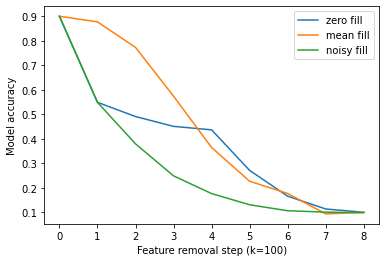

In [24]:
# To get the remove-and-classify score, get the AUC of the plot and plot the removal
# performances for analysis
rac_score = auc(range(len(removal_performances)), removal_performances)
rac_score_norm = rac_score / auc(range(len(removal_performances)), [fmnist_accuracy]*len(removal_performances))
print(f"The remove and classify score is {rac_score_norm: .3f}") 


rac_score = auc(range(len(removal_performances_mean)), removal_performances_mean)
rac_score_norm = rac_score / auc(range(len(removal_performances_mean)), [fmnist_accuracy]*len(removal_performances_mean))
print(f"The remove and classify score for mean fill is {rac_score_norm: .3f}") 


rac_score = auc(range(len(removal_performances_noise)), removal_performances_noise)
rac_score_norm = rac_score / auc(range(len(removal_performances_noise)), [fmnist_accuracy]*len(removal_performances_noise))
print(f"The remove and classify score for noisy fill is {rac_score_norm: .3f}") 

plt.plot(removal_performances, label="zero fill")
plt.plot(removal_performances_mean, label="mean fill")
plt.plot(removal_performances_noise, label="noisy fill")
plt.legend()
plt.ylabel('Model accuracy')
plt.xlabel('Feature removal step (k=100)')
plt.show()

In [36]:
# We only delete references that we do not need later on.
# This avoids unnecessary reimporting and prevents possible
# reseeding, making results not reproducible. We also do not
# need to redefine variables.
# to_delete = [
#     "LeNet", "apply_random_seed", "datasets", "drive", "explanations",
#     "fmnist_accuracy", "fmnist_test", "lenet", "rac_score", "rac_score_norm",
#     "removal_performances", "transform"
# ]

# for reference in to_delete:
#     del globals()[reference]

## **2. Explaining predictions with feature attribution** (25+5+10=40pts)
Recommended start: 25/11/2022

###2.1 CAM implementation (25pts)

In this exercise, you will implement the feature attribution explanation method [CAM by Zhou et al. (2016)](http://ieeexplore.ieee.org/document/7780688/) in PyTorch using an already pre-trained ResNet50 on the image classification task of CUB, which is often used in XAI. CUB is a bird classification dataset with 200 classes of bird species. 

Additionally, you will also implement the vanilla gradient explanation method as a baseline to compare to.

We provide the model and model evaluation code below. Visualize your results with the provided method. 


First, we load the dataset and the model. As this is not a standard PyTorch dataset, we added a bit of functionality to it for our experiments. Loading the dataset takes a bit (loading roughly 3 min).

In [2]:
cub_test = load_cub_test()
num_classes = 200 # 200 bird species in CUB dataset

Files already downloaded and verified


In [15]:
dataloader_cub = DataLoader(cub_test,batch_size=1000)
data = next(iter(dataloader_cub))[0]
cub_mean = data.mean(dim=[0,2,3]) 
cub_max = data.max()
cub_min = data.min()
cub_cov = torch.diag(data.std(dim=[0,2,3]))
print("CUB mean: ",cub_mean)
print("CUB min: ",cub_min)
print("CUB max: ",cub_max)
print("CUB cov: \n",cub_cov)

CUB mean:  tensor([-0.0133,  0.1500,  0.0740])
CUB min:  tensor(-2.1179)
CUB max:  tensor(2.6400)
CUB cov: 
 tensor([[1.0022, 0.0000, 0.0000],
        [0.0000, 0.9990, 0.0000],
        [0.0000, 0.0000, 1.1549]])


#### Load pre-trained ResNet50 with changed architecture in the last layers (5pts)

Then, we load the model. It is a ResNet50 model that is pre-trained on the CUB dataset. 

**Important:** As mentioned during the lecture, there is an architectural change to the classic ResNet50 in the last layers in the provided model. Usually, a ResNet ends with a global average pooling layer before a dense layer, and then followed by a softmax. This is equivalent to changing the last layers to a 1x1 convolutional layer, global average pooling followed by softmax. With this architecture change, it is simpler to extract CAM. 

In [3]:
resnet = resnet50(
    dataset_name="CUB",
    pretrained=False,
    num_classes=num_classes,
    large_feature_map=False,
    use_bn=True
)
ckpt = torch.load(os.path.join(BASE_PATH, "cam_cub_checkpoint.pth.tar")) 
resnet.load_state_dict(ckpt["state_dict"])
resnet.to(device)
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [4]:
cub_accuracy = model_accuracy(resnet, cub_test, batch_size=8)
assert cub_accuracy == 0.799
print(f'Accuracy on the test set: {cub_accuracy:.3f}')

Accuracy on the test set: 0.799


Below, we provide the functions to show an image of the dataset and to visualize the feature attribution explanation as a heatmap overlay. Examples on how to use are also provided.

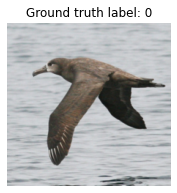

In [5]:
# Example. Visualizing the first test image.
show_sample(dataset=cub_test, sample_idx=0)

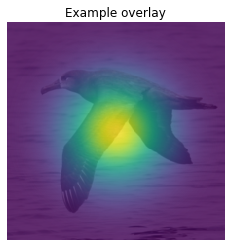

In [6]:
# Example. Visualizing the Gaussian baseline as an attribution explanation overlay.
show_attribution_overlay(
    dataset=cub_test, 
    sample_idx=0,
    attribution_map=centered_gaussian(224, 224),
    title='Example overlay'
)

**Your turn! Write a function to extract CAM from the model to explain a certain prediction.**

#### Extract CAM from the ResNet50 model

In [7]:
def class_activation_map(
    model: torch.nn.Module,
    dataset: torch.utils.data.Dataset,
    sample_idx: int
) -> torch.Tensor:
    """Gets the class activation map of the predicted class as a feature attribution
    explanation from the last convolutional layer of the adapted ResNet model.

    Originally from Zhou et al. (2016).

    Args:
        model: Adapted ResNet model with 1x1 convolution.
        dataset: Dataset containing the instance to be explained.
        sample_idx: Index of the instance to be explained in ``dataset``.
    
    Returns:
        CAM of shape (224, 224) in the case of CUB.

    """
    activation = {}
    def get_activation(name):
        def hook(model, input, output):
            activation[name] = output.detach()
        return hook
    image, _ = dataset[sample_idx]
    image = image.to(device)
    image = image.unsqueeze(0)  # To get the batch size dimension
    #### >>>> PUT YOUR SOLUTION HERE <<<< 
    handle = model.conv_last.register_forward_hook(get_activation("conv_last"))
    pred = model(image)[0].argmax()
    handle.remove()

    cam = activation["conv_last"][:, pred, ...]
    cam = transforms.functional.resize(cam, size=(224, 224))[0].cpu()
    #### >>>> END OF YOUR SOLUTION <<<<
    return cam

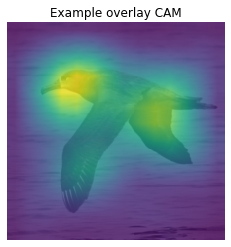

In [8]:
cam = class_activation_map(resnet, cub_test, 0)

show_attribution_overlay(dataset=cub_test, 
                         sample_idx=0,
                         attribution_map=cam.squeeze(),
                         title='Example overlay CAM')

**Your turn again! Write a function to get the saliency map from [Simonyan et al. (2013)](http://arxiv.org/abs/1312.6034) as a local explanation.**

In [9]:
def saliency(
    model: torch.nn.Module,
    dataset: torch.utils.data.Dataset,
    sample_idx: int
) -> torch.Tensor:
    """Computes the saliency map of the predicted class as a feature attribution
    explanation. 

    From Simonyan et al. (2013).

    Args:
        model: Arbitrary vision model.
        dataset: Dataset containing the instance to be explained.
        sample_idx: Index of the instance to be explained in ``dataset``.
    
    Returns:
        Saliency map of shape (224, 224) in the case of CUB.

    """
    image, _ = dataset[sample_idx]
    image = image.to(device)
    image = image.unsqueeze(0)  # To get the batch size dimension
    #### >>>> PUT YOUR SOLUTION HERE <<<<
    image.requires_grad_(True)

    if image.grad is not None:
        image.grad.detach_()
        image.grad.zero_()

    pred = model(image)
    max_pred = pred.max()
    max_pred.backward(inputs=[image])

    saliency = image.grad[0].detach().cpu().abs().max(dim=0)[0]

    image.requires_grad_(False)
    #### >>>> END OF YOUR SOLUTION <<<<
    return saliency

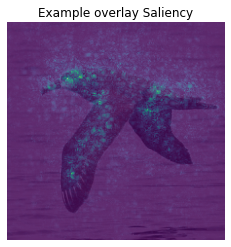

In [10]:
saliency_attribution = saliency(resnet, cub_test, 0)

show_attribution_overlay(
    dataset=cub_test, 
    sample_idx=0,
    attribution_map=saliency_attribution,
    title="Example overlay Saliency"
)

###2.2 Evaluate CAM (5pts)
Evaluate the methods using the remove-and-classify approach from exercise 1.3 of this homework. You may need to adapt the remove-and-classify function to the CUB dataset, because it is not a standard PyTorch dataset (If you need help with this, please contact the tutors since coding this correctly is not the point of this exercise). Report the scores. 

In [11]:
def get_explanations(
    explanation_function: Callable,
    model: torch.nn.Module,
    dataset: torch.utils.data.Dataset
) -> torch.Tensor:
    """Computes the explanations for the whole dataset specified in ``dataset``.

    Args:
        explanation_function: Python function that takes arguments
            ``model`, ``dataset``, ``idx``.
        model: Model to be explained that is compatible with ``explanation_function``.
        dataset: Dataset for which explanations are gathered.

    Returns:
        A tensor of shape (batch_size, height, width) that contains explanations for all
        samples in ``dataset``.

    """
    explanations = []
    for idx in tqdm(range(len(dataset))):
        explanation = explanation_function(model, dataset, idx)
        explanations.append(explanation)
    return torch.stack(explanations)

get cam explanations


100%|██████████| 1000/1000 [00:10<00:00, 93.09it/s]


fill with mean / zero :


100%|██████████| 21/21 [00:39<00:00,  1.87s/it]


fill with noise:


100%|██████████| 21/21 [00:39<00:00,  1.90s/it]


(mean):  The remove and classify score is  0.096
(noise): The remove and classify score is  0.076


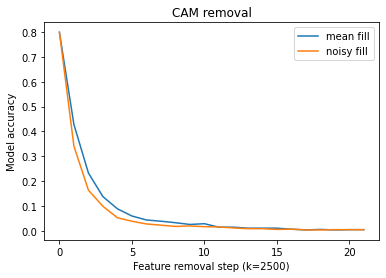

In [35]:
# Evaluation of CAM
# First, get the explanations
print('get cam explanations')
cam_explanations = get_explanations(class_activation_map, resnet, cub_test)  # (b, 224, 224)

# Then remove-and-classify, this takes roughly 5-10 min depending on the GPU you got
# assigned from Colab

# Calculate removal performance for explanation by cam and filling pixels with
# zero values
print("fill with mean / zero :")
cam_removal_performances = remove_and_classify(
    model=resnet,
    dataset=cub_test,
    explanations=cam_explanations,
    k=2500,
    fill='zero'
)
cam_removal_performances.insert(0, cub_accuracy)

# mean = zero , we don't calculate the performance for a mean filling,
# since the mean value is almost zero for the cub dataset

# noise
print("fill with noise:")
cam_removal_performances_noise = remove_and_classify(
    model=resnet,
    dataset=cub_test,
    explanations=cam_explanations,
    k=2500,
    fill='noise',
    mean=cub_mean,
    cov =cub_cov
)
cam_removal_performances_noise.insert(0, cub_accuracy)

# Inspect the results
# mean
rac_score = auc(range(len(cam_removal_performances)), cam_removal_performances)
rac_score_norm = rac_score / auc(
    range(len(cam_removal_performances)), [cub_accuracy] * len(cam_removal_performances)
)
print(f"\n(mean):  The remove and classify score is {rac_score_norm: .3f}") 
# noise
rac_score = auc(range(len(cam_removal_performances_noise)), cam_removal_performances_noise)
rac_score_norm_cam = rac_score / auc(range(len(cam_removal_performances_noise)), [cub_accuracy]*len(cam_removal_performances_noise))
print(f"(noise): The remove and classify score is {rac_score_norm_cam: .3f}")  

plt.plot(cam_removal_performances,label="mean fill")
plt.plot(cam_removal_performances_noise,label="noisy fill")
plt.ylabel('Model accuracy')
plt.title("CAM removal")
plt.legend()
plt.xlabel('Feature removal step (k=2500)')
plt.show()

In [33]:
# # Free up RAM in colab
# del globals()['cam_explanations']
# del globals()['cam_removal_performances']

get saliency explanations


100%|██████████| 1000/1000 [00:33<00:00, 30.18it/s]


fill with mean / zero :


100%|██████████| 21/21 [00:39<00:00,  1.86s/it]


fill with noise:


100%|██████████| 21/21 [00:40<00:00,  1.91s/it]


(mean): The remove and classify score is  0.074
(noise): The remove and classify score is  0.046


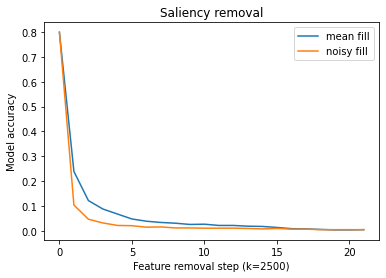

In [31]:
# Evaluation of saliency

# First, get the explanations
print('get saliency explanations')
saliency_explanations = get_explanations(saliency, resnet, cub_test)

# then remove-and-classify
# mean
print("fill with mean / zero :")
saliency_removal_performances = remove_and_classify(
    model=resnet,
    dataset=cub_test,
    explanations=saliency_explanations,
    k=2500
)
saliency_removal_performances.insert(0, cub_accuracy)

# noise
print("fill with noise:")
saliency_removal_performances_noise = remove_and_classify(
    model=resnet,
    dataset=cub_test,
    explanations=saliency_explanations,
    k=2500,
    fill='noise',
    mean=cub_mean,
    cov =cub_cov
)
saliency_removal_performances_noise.insert(0, cub_accuracy)


# Inspect the results
# mean
rac_score = auc(range(len(saliency_removal_performances)), saliency_removal_performances)
rac_score_norm = rac_score / auc(
    range(len(saliency_removal_performances)),
    [cub_accuracy] * len(saliency_removal_performances)
)
print(f"\n(mean):  The remove and classify score is {rac_score_norm: .3f}") 
# noise
rac_score = auc(range(len(saliency_removal_performances_noise)), saliency_removal_performances_noise)
rac_score_norm_saliency = rac_score / auc(range(len(saliency_removal_performances_noise)), [cub_accuracy]*len(saliency_removal_performances_noise))
print(f"(noise): The remove and classify score is {rac_score_norm_saliency: .3f}") 

plt.plot(saliency_removal_performances,label="mean fill")
plt.plot(saliency_removal_performances_noise,label="noisy fill")
plt.legend()
plt.title("Saliency removal")
plt.ylabel('Model accuracy')
plt.xlabel('Feature removal step (k=2500)')
plt.show()

fill with cov/2 :


100%|██████████| 21/21 [00:40<00:00,  1.92s/it]


fill with cov/3 :


100%|██████████| 21/21 [00:39<00:00,  1.89s/it]


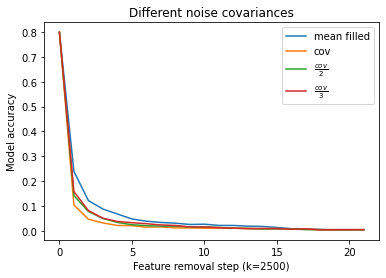

In [36]:
# Test effects of used covariance
print("fill with cov/2 :")
saliency_removal_performances_std2 = remove_and_classify(
    resnet, cub_test, 
    saliency_explanations, 
    k=2500,
    fill='noise',
    mean=cub_mean,
    cov=cub_cov/2
)
saliency_removal_performances_std2.insert(0, cub_accuracy)

print("fill with cov/3 :")
saliency_removal_performances_std3 = remove_and_classify(
    resnet, 
    cub_test, 
    saliency_explanations, 
    k=2500,
    fill='noise',
    mean=cub_mean,
    cov=cub_cov/3
)
saliency_removal_performances_std3.insert(0, cub_accuracy)


plt.plot(saliency_removal_performances, label="mean filled")
plt.plot(saliency_removal_performances_noise,label="cov")
plt.plot(saliency_removal_performances_std2,label=r"$\frac{cov}{2}$")
plt.plot(saliency_removal_performances_std3,label=r"$\frac{cov}{3}$")
plt.ylabel('Model accuracy')
plt.xlabel('Feature removal step (k=2500)')
plt.legend()
plt.title("Different noise covariances")
plt.show()

In [ ]:
# # Free up RAM in colab
# del globals()['saliency_explanations']
# del globals()['saliency_removal_performances']

fill with mean / zero :


100%|██████████| 21/21 [00:38<00:00,  1.84s/it]


fill with noise :


100%|██████████| 21/21 [00:39<00:00,  1.88s/it]


(mean): The remove and classify score is  0.240
(noise): The remove and classify score is  0.205


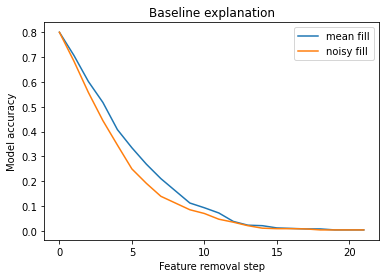

In [30]:
# Evaluation of Gaussian map baseline

# First, get the explanations
baseline_explanations = torch.from_numpy(np.stack(
    [centered_gaussian(224, 224)] * len(cub_test))
)
 
# Then we apply remove-and-classify
print("fill with mean / zero :")
baseline_removal_performances = remove_and_classify(
    model=resnet,
    dataset=cub_test,
    explanations=baseline_explanations,
    k=2500
)
baseline_removal_performances.insert(0, cub_accuracy)

# noise
print("fill with noise :")
baseline_removal_performances_noise = remove_and_classify(
    resnet, 
    cub_test, 
    baseline_explanations, 
    k=2500,
    fill='noise',
    mean=cub_mean,
    cov=cub_cov
)
baseline_removal_performances_noise.insert(0, cub_accuracy)

# Inspect the results
rac_score = auc(range(len(baseline_removal_performances)), baseline_removal_performances)
rac_score_norm = rac_score / auc(
    range(len(baseline_removal_performances)),
    [cub_accuracy] * len(baseline_removal_performances))
print(f"\n(mean):  The remove and classify score is {rac_score_norm: .3f}") 
rac_score = auc(range(len(baseline_removal_performances_noise)), baseline_removal_performances_noise)
rac_score_norm_baseline = rac_score / auc(range(len(baseline_removal_performances_noise)), [cub_accuracy]*len(baseline_removal_performances_noise))
print(f"(noise): The remove and classify score is {rac_score_norm_baseline: .3f}") 


plt.plot(baseline_removal_performances,label="mean fill")
plt.plot(baseline_removal_performances_noise,label="noisy fill")
plt.ylabel('Model accuracy')
plt.xlabel('Feature removal step')
plt.legend()
plt.title("Baseline explanation")
plt.show()

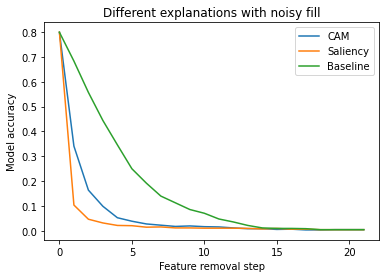

Remove and classify score for Saliency (noise) :  0.046
Remove and classify score for CAM (noise)      :  0.076
Remove and classify score for Baseline (noise) :  0.205


In [37]:
plt.plot(cam_removal_performances_noise,label="CAM")
plt.plot(saliency_removal_performances_noise,label="Saliency")
plt.plot(baseline_removal_performances_noise,label="Baseline")
plt.ylabel('Model accuracy')
plt.xlabel('Feature removal step')
plt.legend()
plt.title("Different explanations with noisy fill")
plt.show()
print(f"Remove and classify score for Saliency (noise) : {rac_score_norm_saliency: .3f}")  
print(f"Remove and classify score for CAM (noise)      : {rac_score_norm_cam: .3f}")  
print(f"Remove and classify score for Baseline (noise) : {rac_score_norm_baseline: .3f}")  

###2.3 Discussion (10 pts)
Briefly discuss your experimental results, both from visual inspection and the quantitative analysis. What does the evaluation say about CAM? What could be limitations of the remove-and-classify approach, too? Does it make sense to e.g. weight different parts of the AUC differently?

In [36]:
# Visual inspection

unnormalize_transform = transforms.Compose([
    transforms.Normalize(
        mean=[0.0, 0.0, 0.0],
        std=[1 / 0.229, 1 / 0.224, 1 / 0.225]
    ),
    transforms.Normalize(mean=[-0.485, -0.456, -0.406], std=[1.0, 1.0, 1.0]),
])

def make_comparison(n, k):
    original_image = cub_test.data[n]
    original_image_plot = unnormalize_transform(original_image).permute(1, 2, 0)

    fig, axs = plt.subplots(1, 4, figsize=(16, 4))
    fig.suptitle("Different Perturbations")
    axs[0].set_title("Original")
    axs[0].set_axis_off()
    axs[1].set_title("Gaussian")
    axs[1].set_axis_off()
    axs[2].set_title("Saliency")
    axs[2].set_axis_off()
    axs[3].set_title("CAM")
    axs[3].set_axis_off()

    def plot_to_axis(ax, explanation):
        perturbed_image = original_image.clone()
        perturbed_image_flat = perturbed_image.flatten(start_dim=1, end_dim=2)

        _, feature_size = perturbed_image_flat.shape
        indices = explanation.flatten().argsort(descending=True)[:k]

        perturbed_image_flat[:, indices] = 0
        perturbed_image_plot = unnormalize_transform(
            perturbed_image
        ).permute(1, 2, 0)
        ax.imshow(perturbed_image_plot)

    # Original
    axs[0].imshow(original_image_plot)

    # Gaussian
    gaussian_explanation = torch.from_numpy(centered_gaussian(224, 224))
    plot_to_axis(axs[1], gaussian_explanation)

    # Saliency
    saliency_explanation = saliency(resnet, cub_test, n)
    plot_to_axis(axs[2], saliency_explanation)

    # CAM
    cam_explanation = class_activation_map(resnet, cub_test, n)
    plot_to_axis(axs[3], cam_explanation)

_ = interact(
    make_comparison,
    n=widgets.BoundedIntText(
        min=0, max=len(cub_test) - 1, value=0, description="Index:"
    ),
    k=widgets.IntSlider(
        min=100, max=20_000, value=2000, description="k:"
    ),
)

interactive(children=(BoundedIntText(value=0, description='Index:', max=999), IntSlider(value=2000, descriptio…

Let us start with the visual inspection and qualitative analysis.

As can be seen on the interactive plot above, the Gaussian perturbation considers the center pixels to be of most importance, regardless of the actual image.

The saliency map gives us the best possible *local* counterfactual explanation in an infinitesimally small neighborhood of each pixel. However, it results in an explanation that is very hard to interpret and violates the *selectivity* criterion of a good explanation we defined at the beginning of the exercise. One could also argue that the *contrastiveness* it supplies is also not informative for humans, as it considers infinitesimally small perturbations. (Note that we *turned off* the pixels here and did not just perturb it by a small value, but the *choice of pixels* was made based on the gradient magnitudes.) We can conclude that it is overall a poor explanation for humans.

The CAM explanation is much more connected than the saliency map. It is also much more global by construction, as the corresponding ResNet layer's level of abstraction is quite high. This results in a visually pleasing explanation that is also theoretically backed under the assumption that the attribution to the pixels in the activation map corresponds to the attribution to the respective original pixels. Overall we would choose this method from the three.

Let us now turn to the quantitative analysis of the benchmarks above.

The metric considered here is the (relative) auc score of the remove-and-classify accuracies. The best possible score on this metric is 0, which corresponds to the accuracy dropping to 0 already after the first $k$ removed pixels. Generally, we would like to see a convex (piecewise linear) curve here. If it is concave, it means that we remove not so relevant pixels first. 

The question arieses how to actually remove pixels. Therefore, we tested three different methods: Filling removed pixels with the mean of the dataset or with zero and lastly by sampling gaussian noise with the mean and variance of the dataset.
In the case of FashionMNIST the non informative background has always a value of 0 whereas a pixel value of the dataset mean is always part of an object. Filling pixels inside the centered objects with a mean value is therefore not synonymous with removing them. This leads to a concave roc. Filling removed pixels with 0 leads to a steep drop in acuracy for the first 100 removed pixels but then reaches a plateau. However, filling with gaussian noise leads to a convex ROC. This behaviour also holds for the CUB dataset, where the AUC of a fill by noise is always lower than that of a fill by a mean value. 
In the case of saliency removal, filling with noise lowers the AUC by a factor of 1.7 and for CAM by 1.25 .
From this we concluded that filling removed pixels with gaussian noise comes closest to actually removing these features and we used this approach for the following discussion.

The saliency map performs best on this metric ($\text{auc}^\text{norm} = 0.046$), the CAM method is a bit behind ($\text{auc}^\text{norm} = 0.077$) and the Gaussian baseline method is notable worse ($\text{auc}^\text{norm} = 0.205$). This makes intuitive sense: the saliency map gives us attributions that are provably faithful to infinitesimal counterfactual perturbations and is not concerned at all about the human interpretability of the attributions. As can be seen, the saliency map also generalizes well to global perturbations (i.e., turning the respective pixels off). The CAM method only leverages (and explains) the very last, linear part of the model and uses the assumption mentioned above. It is quite coarse because of the employed upscaling, meaning that it indeed only captures important parts of the feature map (and correspondingly the input image, according to the assumption above) resulting in a human-interpretable method, but it is also less tailored towards this metric because of the coarseness. (Of course this coarseness is paired with a high abstraction level, so the CAM feature map corresponds to high-level features, which is a huge bonus regarding human interpretability.) The baseline also performs poorly here, unsurprisingly.

Now we would like to address the limitations of the remove-and-classify approach. The method measures the drop in accuracy after turning off individual pixels based on their importance. It treats pixels independently which is very often violated. For example, if two pixels have high importance the method will turn both of them off, even though they might be highly correlated regarding the network's predictions and one could achieve a more significant accuracy drop by turning off less correlated pixels. Even more importantly, this metric is seemingly not well aligned with human interpretability, as the saliency map method achieved better scores than the CAM method. This is questionable, as the ultimate goal of XAI is facilitating human-computer interaction and providing human-interpretable explanations. It simply measures how accuracy changes based on the provided attributions, which might or might not be what we want to measure.

Lastly, we would like to discuss the proposed idea of weighting different parts of the curve in the AUC metric differently. It would make sense to weight the area at early $k$ values more, as we are mainly interested in the most important attributions (i.e., the ones with the highest values), and they are removed at early $k$s. Thus, in order to measure the true impact of the attributions on accuracy, we should consider the effects of the most important ones.

In [ ]:
to_delete = [
    "auc", "baseline_explanations", "baseline_removal_performances", "cam",
    "centered_gaussian", "ckpt", "class_activation_map", "create_auxiliary_tensors",
    "cub_accuracy", "cub_test", "get_explanations", "load_cub_test", "make_comparison",
    "model_accuracy", "num_classes", "rac_score", "rac_score_norm", "remove_and_classify",
    "saliency", "saliency_attribution"
]

for reference in to_delete:
    del globals()[reference]

## **3. Explaining a model with feature visualization** (15+15=30pts)
Recommended start: 2/12/2022

###3.1 Feature visualization implementation (15pts)

In this exercise, you are going to implement feature visualization of features learned by neurons of a GoogLeNet model. For regularization we will use the total variation regularizer from [Mahendran and Vevaldi (2014)](http://arxiv.org/abs/1412.0035). Beware that their paper is not about feature visualization, but about image reconstruction.

Feature visualization is an optimization problem, where we are optimizing an input image to maximize the activation of certain units in the inference model. These units can be single neurons, but also convolutional filters.

Try different starting images (e.g. random noise, any image) and feel free to play around with the resulting visualizations.


In [ ]:
# First, we load the inference model from the PyTorch Hub.
# We do a small change to the forward method of the model, by adding a clamp.
# This keeps the input image in a valid range.

class MyGoogLeNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.googlenet = torch.hub.load(
            repo_or_dir='pytorch/vision:v0.10.0',
            model='googlenet',
            pretrained=True
        )

    def forward(self, x):
        x = torch.clamp(x, 0, 1)
        x = self.googlenet(x)
        return x

In [ ]:
net = MyGoogLeNet().to(device)
net.eval()

In [ ]:
# We provide a simple visualization function of the image 
def visualize(x: torch.Tensor):
    """Function to visualize image ``x`` (detached from computational graph) with plt."""
    x = x.cpu()
    x = x.permute(1, 2, 0)  # Switch dimensions to bring RGB to back
    plt.imshow(x)

In [ ]:
# We require the Hook method below to specify which network unit to target
# in the visualization.

# In contrast to the hook method used to compute CAM in exercise 2,
# here we do not detach the activation because we require it for optimization
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output
    return hook

# YOUR TURN: try out different channels/layers/units/etc. You can take inspiration from 
# https://distill.pub/2017/feature-visualization/appendix/googlenet/4b.html#channel-4

# A whole inception layer
handle_1 = net.googlenet.conv1.register_forward_hook(get_activation("1"))
handle_3 = net.googlenet.conv3.register_forward_hook(get_activation("3"))
handle_3b = net.googlenet.inception3b.register_forward_hook(get_activation("3b"))
handle_4b = net.googlenet.inception4b.register_forward_hook(get_activation("4b"))
handle_4e = net.googlenet.inception4e.register_forward_hook(get_activation("4e"))
handle_5b = net.googlenet.inception5b.register_forward_hook(get_activation("5b"))
# One convolutional layer of the inception layer
# handle = net.googlenet.inception4a.branch1.conv.register_forward_hook(
#     get_activation("4a1conv")
# )
# The final layer
handle_fc = net.googlenet.fc.register_forward_hook(get_activation("fc"))

**Your turn! Take a look at the code below and complete it to optimize the input image for high activation of the unit.**

In [ ]:
x_dict = {}  # Dict to store the optimized images
keys = ["1", "3", "3b", "4b", "4e", "5b", "fc"]
channels = [3, 3, 2, 17, 9, 4, 99]
for key, channel in zip(keys, channels):
    print(f"Starting {key}, feature map dimensions: ", end="")
    # Start with a random image.
    # We want to optimize x to maximize the activation.
    x = torch.rand((3, 224, 224), requires_grad=True, device=device)

    optimizer = Adam([x], lr=0.01)  # Optimizer for the image
    num_epochs = 500

    x_prog = {}  # Dict to store optimization steps

    dim_queried = False

    for step in range(num_epochs):
        optimizer.zero_grad()

        # Run the model on the input
        net(x.unsqueeze(0))  # Unsqueeze to simulate the batch

        # Get the activation of a unit
        neuron_activation = activation[key].squeeze()[channel]  # Take channel index 2

        if not dim_queried:
            print(activation[key].shape)
            dim_queried = True

        # Log progress
        if step % 50 == 0:
            print(f"\r\tMean activation in Step {step}: "
                  f"{neuron_activation.mean().item():.3f}", end="")
            x_prog[step] = torch.clamp(x, 0, 1).clone().detach()

        # Define the loss 
        loss = -neuron_activation.mean()

        # Backpropagate and optimize
        loss.backward()
        optimizer.step()
    
    x_dict[key] = x_prog
    print()

# Visualize the progressions
for layer_key in x_dict:
    plt.figure(figsize=(20, 8))
    plt.suptitle(f"Layer {layer_key}")
    for i, key in enumerate(x_dict[layer_key]):
        plt.subplot(2, 5, i + 1)
        visualize(x_dict[layer_key][key])
        plt.title(f'After {key} iterations')
    plt.show()

Let's add the total variation regularizer and see what happens. 

In [ ]:
def total_variation(x, beta):
    return (
        (x[:, 1:, :-1] - x[:, :-1, :-1]).pow(2)
        + (x[:, :-1, 1:] - x[:, :-1, :-1]).pow(2)
    ).pow(beta / 2).sum()

def total_variation_google(x):
    pixel_dif1 = x[:, 1:, :] - x[:, :-1, :]
    pixel_dif2 = x[:, :, 1:] - x[:, :, :-1]
    return pixel_dif1.abs().sum() + pixel_dif2.abs().sum()

In [ ]:
### PLAYGROUND
x = torch.rand((3, 224, 224), requires_grad=True, device=device)

optimizer = Adam([x], lr=0.05)  # Optimizer for the image
num_epochs = 4000
x_prog_tv = {}  # Dict to store the optimized images

lambda_ = 1e-3
beta = 1

for step in range(num_epochs):
    optimizer.zero_grad()

    # Run the model on the input
    net(x.unsqueeze(0))  # Unsqueeze to simulate the batch

    # get the activation of a unit
    neuron_activation = activation["4e"].squeeze()[10]  # 5

    # Log progress
    if step % (num_epochs // 10) == 0:
        print(f"Mean activation in Step {step}: {neuron_activation.mean().item(): .3f}")
        x_prog_tv[step] = x.clone().detach().clamp(0, 1)

    # Define the loss
    loss = -neuron_activation.mean() + lambda_ * total_variation(x, beta)

    # Backpropagate and optimize
    loss.backward()
    optimizer.step()

# Visualize the progressions
plt.figure(figsize=(20, 8))

for i, key in enumerate(x_prog_tv.keys()):
    plt.subplot(2, 5, i + 1)
    visualize(x_prog_tv[key])
    plt.title(f'After {key} iterations')

In [ ]:
x_dict_tv = {}  # Dict to store the optimized images
lambdas = [5e-6, 1e-5, 1e-4, 5e-4, 1e-3, 5e-3, 5e-2]
keys = ["1", "3", "3b", "4b", "4e", "5b", "fc"]
num_epochs = [1000, 1000, 1000, 1000, 4000, 4000, 4000]
channels = [3, 3, 2, 17, 10, 7, 99]
for key, lambda_, channel, num_epoch in zip(keys, lambdas, channels, num_epochs):
    print(f"Starting {key}, feature map dimensions: ", end="")
    # Start with a random image.
    # We want to optimize x to maximize the activation.
    x = torch.rand((3, 224, 224), requires_grad=True, device=device)

    optimizer = Adam([x], lr=0.05)  # Optimizer for the image
    x_prog_tv = {}  # Dict to store the optimized images

    beta = 1

    dim_queried = False

    for step in range(num_epoch):
        optimizer.zero_grad()

        # Run the model on the input
        net(x.unsqueeze(0))  # Unsqueeze to simulate the batch

        # Get the activation of a unit
        neuron_activation = activation[key].squeeze()[channel]

        if not dim_queried:
            print(activation[key].shape)
            dim_queried = True

        # Log progress
        if step % (num_epoch // 10) == 0:
            print(f"\r\tMean activation in Step {step}: "
                  f"{neuron_activation.mean().item():.3f}", end="")
            x_prog_tv[step] = torch.clamp(x, 0, 1).clone().detach()

        # Define the loss 
        loss = -neuron_activation.mean() + lambda_ * total_variation(x, beta)

        # Backpropagate and optimize
        loss.backward()
        optimizer.step()
    
    x_dict_tv[key] = x_prog_tv
    print()

# Visualize the progressions
for layer_key in x_dict_tv:
    plt.figure(figsize=(20, 8))
    plt.suptitle(f"Layer {layer_key}")
    for i, key in enumerate(x_dict_tv[layer_key]):
        plt.subplot(2, 5, i + 1)
        visualize(x_dict_tv[layer_key][key])
        plt.title(f"After {key} iterations")
    plt.show()

Below we show a different "total variation" regularizer that was used for the cited Google blog post.

In [ ]:
x_dict_tv = {}  # Dict to store the optimized images
lambdas = [5e-6, 1e-5, 1e-4, 5e-4, 1e-3, 5e-3, 5e-2]
keys = ["1", "3", "3b", "4b", "4e", "5b", "fc"]
num_epochs = [1000, 1000, 1000, 1000, 4000, 4000, 4000]
channels = [3, 3, 2, 17, 10, 7, 99]
for key, lambda_, channel, num_epoch in zip(keys, lambdas, channels, num_epochs):
    print(f"Starting {key}, feature map dimensions: ", end="")
    # Start with a random image.
    # We want to optimize x to maximize the activation.
    x = torch.rand((3, 224, 224), requires_grad=True, device=device)

    optimizer = Adam([x], lr=0.05)  # Optimizer for the image
    x_prog_tv = {}  # Dict to store the optimized images

    dim_queried = False

    for step in range(num_epoch):
        optimizer.zero_grad()

        # Run the model on the input
        net(x.unsqueeze(0))  # Unsqueeze to simulate the batch

        # Get the activation of a unit
        neuron_activation = activation[key].squeeze()[channel]

        if not dim_queried:
            print(activation[key].shape)
            dim_queried = True

        # Log progress
        if step % (num_epoch // 10) == 0:
            print(f"\r\tMean activation in Step {step}: "
                  f"{neuron_activation.mean().item():.3f}", end="")
            x_prog_tv[step] = torch.clamp(x, 0, 1).clone().detach()

        # Define the loss 
        loss = -neuron_activation.mean() + lambda_ * total_variation_google(x)

        # Backpropagate and optimize
        loss.backward()
        optimizer.step()
    
    x_dict_tv[key] = x_prog_tv
    print()

# Visualize the progressions
for layer_key in x_dict_tv:
    plt.figure(figsize=(20, 8))
    plt.suptitle(f"Layer {layer_key}")
    for i, key in enumerate(x_dict_tv[layer_key]):
        plt.subplot(2, 5, i + 1)
        visualize(x_dict_tv[layer_key][key])
        plt.title(f"After {key} iterations")
    plt.show()

We can observe that the synthesized images are not marginally different between the two regularizers. For the FC layer in this particular case, the "Google" total variation regularizer seems to produce more human-interpretable results for the class "goose", but maybe it is at the cost of faithfulness of the feature attributions. Based on our experiments, we cannot announce either technique as clearly better, and the results are almost identical in general.

We would also like to investigate how the image initialization influences the optimization procedure. To this end, we chose a random image from the internet, pre-processed it appropriately and initialized ``x`` to it. The results can be seen below.

In [ ]:
img_path = os.path.join(BASE_PATH, "catdog.jpg")
from PIL import Image
img = Image.open(img_path)
img = img.resize((224, 224))
img = torch.from_numpy(np.array(img))
x = img.permute(2, 0, 1) / 255.
x = x.to(device).requires_grad_(True)

optimizer = Adam([x], lr=0.05)  # Optimizer for the image
num_epochs = 4000
x_prog_tv = {}  # Dict to store the optimized images

lambda_ = 5e-6

for step in range(num_epochs):
    optimizer.zero_grad()

    # Run the model on the input
    net(x.unsqueeze(0))  # Unsqueeze to simulate the batch

    # get the activation of a unit
    neuron_activation = activation["4b"].squeeze()[2]

    # Log progress
    if step % (num_epochs // 10) == 0:
        print(f"Mean activation in Step {step}: {neuron_activation.mean().item(): .3f}")
        x_prog_tv[step] = x.clone().detach().clamp(0, 1)

    # Define the loss
    loss = -neuron_activation.mean() + lambda_ * total_variation_google(x)

    # Backpropagate and optimize
    loss.backward()
    optimizer.step()

# Visualize the progressions
plt.figure(figsize=(20, 8))

for i, key in enumerate(x_prog_tv.keys()):
    plt.subplot(2, 5, i + 1)
    visualize(x_prog_tv[key])
    plt.title(f'After {key} iterations')

For larger ``lambda_`` values the influence of the initial image is not clear. However, for e.g. ``lambda_ = 5e-6``, we start to clearly see the outline of the animals in the initial image. Thus, we can conclude that under a certain regularization threshold the initial image has a large effect on the generated attribution map, and we should thus stick to initializing with images that contain no information if we only want to measure the weight attributions of a layer / neuron.

###3.2 Discussion (15pts)

Discuss your observations from the feature visualizations. 
- What is the effect of the total variation regularization? Does it make sense?

The total variation regularization penalizes large changes between neighboring image pixels. If we just optimize our image to get high activations from a neuron/layer, we get very noisy input images that contain high-frequency patterns. These are not human-interpretable and fail to achieve the end goal of weight attributions, which is to give humans an explanation about the model's behavior which they can easily understand. The images produced by unregularized optimization lie way outside the natural image data manifold but the network is very confident about their corresponding labels, making them essentially adversarial examples for the network. These are obviously not what we are interested in, rather what kind of *natural images* the model's neurons react strongly to.

Total variation regularization mitigates this issue. By punishing high-frequency changes in the input through a discrete, finite-difference gradient approximation, the synthesized images are "pushed" towards the natural image data manifold and thus also become more human-interpretable. According to this reasoning, we would say that it is a useful ingredient towards interpretable attributions. As we can see, however, total variation regularization is not enough alone to give meaningful attributions. In the above plots we carefully picked channels where the synthesized image *might* correspond to human-understandable semantic concepts. In the majority of them it would be very hard to reason about abstract concepts the layer in question is paying attention to. We can see in the [linked resource](https://distill.pub/2017/feature-visualization/) that by using more sophisticated methods, one can obtain much more semantically meaningful attributions. However, we should be careful with directly interpreting these, as by moving away from direct, unregularized optimization we are introducing more and more human inductive biases, and can easily fall into the trap of confirmation bias.

- What kind of insights do feature visualizations give into the model? How general are these insights?

By the optimization procedure above, we can obtain example images that cause high activation in either a certain neuron, or an entire layer, etc. By regularizing in clever ways, we can also obtain images that are more human-interpretable than the sole maximizers of certain activations. The mentioned generality can be understood in several ways. First of all, as we use these attribution methods on already trained networks, the resulting attribution maps are implicitly influenced by the entire training dataset through the weights, so the insights found by these methods are quite general with respect to the training set. Secondly, if we do *not* optimize wrt. the last fc layer's attributions (so the actual semantic classes) then the generated images are still local to a particular channel/neuron of an intermediate layer, which is not general at all: by changing the layer or the neuron in question, we get marginally different images. This also showcases the complexity of DNNs and how hard it is *still* to understand their internals, even with such methods available.

- Where could such explanations be used?

These explanations capture the hierarchical structure of CNNs very well: by optimizing for activations of deeper layers, we obtain images that correspond to more and more abstract notions. Such general trends are easy to see and can help students who are learning about these networks. (However, local trends are still very hard to interpret, as the generated images vary considerably by simply considering different feature channels in the same layer.) In the [cited resource](https://distill.pub/2017/feature-visualization/) it is also emphasized that the method can be used to visualize how particular neurons act jointly and how they *represent information* jointly. By looking at some of the visualizations in the linked resource, we can also see that sometimes we are able to detect *spurious correlations* in the generated images. Not only are we able to detect that the model suffers from such spurious correlations, we can also *localize* these effects to some extent by knowing which neuron's/layer's activations gave rise to such an image. In the lecture we have discussed potential ways to overcome spurious correlations that we could employ after detecting it. It would be interesting to have a method that could highlight certain neurons in the network that might be useful to investigate with such feature visualization methods.



**WRITE YOUR ANSWER HERE**

## **4. (Bonus) Short Paper Review** (10pts)

In this bonus task, your task is to write a short review for **one** of the following papers: 
- [THIS LOOKS LIKE IT RATHER THAN THAT: PROTOKNN FOR SIMILARITY-BASED CLASSIFIERS](https://openreview.net/forum?id=lh-HRYxuoRr). 
- [TAKE 5: INTERPRETABLE IMAGE CLASSIFICATION WITH A HANDFUL OF FEATURES](https://openreview.net/forum?id=9EcAsB7wgM)
- [ViT-CX: Causal Explanation of Vision Transformers](http://arxiv.org/abs/2211.03064)

Below is are a few questions to consider in a review as inspiration (Slightly adapted from [ICML'22 reviewer guide](https://drive.google.com/file/d/15hPTA64h31ShaoybLWeU3moZan7zVbr_/view))
- A concise summary of the paper
    - What problem is addressed in the paper?
    - Why does the problem matter?
    - What is the key to the solution? What is the main contribution?
    - Do the experiments sufficiently support the claims?
- A clear statement of strengths and weaknesses
    - What are the key contributions and why do they matter?
    - What aspects of the paper most need improvement?
- A comprehensive check of potential fundamental flaws in the paper
    - Are the assumptions and theories (mathematically) sound?
    - Are the experiments scientifically sound and valid?
    - Is the problem addressed trivial?


**WRITE YOUR ANSWER HERE**